## Tarefas de classificação na base de dados do ENEM.

##### Alunos:
- Gabriel Fonseca (2111066)
- Yasmim Santos (2116925)
- Alejandro Elias (2111189)
- Pedro Lucas (2111131)

Base de dados escolhida - Exame Nacional do Ensino Médio (Enem): https://basedosdados.org/dataset/3e9c8804-c31c-4f48-9a45-d67f1c21a859

### Importando as dependências:

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler as UnderSampler

### Lendo, visualizando e preparando os dados:

In [63]:
df_enem = pd.read_csv(
    f"../data/out/enem-dados-tratados.csv",
    dtype={
        "id_inscricao": np.int64,
        "ensino": int,
        "nota_ciencias_natureza": float,
        "nota_ciencias_humanas": float,
        "nota_linguagens_codigos": float,
        "nota_matematica": float,
        "nota_redacao": float,
        "q_formacao_pai": str,
        "q_formacao_mae": str,
        "q_renda_familia": str,
    },
)

df_enem

,id_inscricao,ensino,nota_ciencias_natureza,nota_ciencias_humanas,nota_linguagens_codigos,nota_matematica,nota_redacao,q_formacao_pai,q_formacao_mae,q_renda_familia,ano
0,150001892848,3,366.8,436.9,374.2,331.4,380.0,B,A,C,2015
1,150002421428,1,512.0,636.9,552.0,549.2,760.0,A,A,C,2015
2,150004396764,1,470.8,519.3,465.2,350.8,580.0,B,A,B,2015
3,150001657786,1,492.6,641.2,553.2,649.5,840.0,A,A,A,2015
4,150005415838,1,473.3,533.4,443.3,447.4,400.0,A,A,A,2015
...,...,...,...,...,...,...,...,...,...,...,...
357268,210054596750,1,450.6,403.1,443.3,479.8,0.0,E,E,B,2022
357269,210056286560,1,416.5,427.3,484.6,376.2,0.0,D,D,A,2022
357270,210057495281,1,462.1,421.7,432.1,530.9,0.0,C,D,B,2022
357271,210056812211,1,519.1,570.4,537.3,388.7,0.0,D,H,B,2022


In [64]:
mm_scaler = MinMaxScaler()

df_enem = df_enem[df_enem["nota_ciencias_natureza"] != 0.0]
df_enem = df_enem[df_enem["nota_ciencias_humanas"] != 0.0]

df_enem["nota_objetiva"] = (
    df_enem["nota_ciencias_natureza"]
    + df_enem["nota_ciencias_humanas"]
    + df_enem["nota_linguagens_codigos"]
    + df_enem["nota_matematica"]
) / 4

df_enem["nota_objetiva_scl"] = mm_scaler.fit_transform(df_enem[["nota_objetiva"]])

df_enem["q_renda_familia_classe"] = df_enem["q_renda_familia"].map(
    {
        "A": "nenhuma_renda",
        "B": "muito_baixa_renda",
        "C": "muito_baixa_renda",
        "D": "muito_baixa_renda",
        "E": "muito_baixa_renda",
        "F": "baixa_renda",
        "G": "baixa_renda",
        "H": "baixa_renda",
        "I": "baixa_renda",
        "J": "media_renda",
        "K": "media_renda",
        "L": "media_renda",
        "M": "media_renda",
        "N": "alta_renda",
        "O": "alta_renda",
        "P": "alta_renda",
        "Q": "alta_renda",
    }
)


# tirando as colunas do dataframe
df_enem = df_enem.drop(
    columns=[
        "id_inscricao",
        "ensino",
        "nota_ciencias_natureza",
        "nota_ciencias_humanas",
        "nota_linguagens_codigos",
        "nota_matematica",
        "nota_redacao",
        "q_formacao_pai",
        "q_formacao_mae",
        "q_renda_familia",
    ]
)


df_enem

,ano,nota_objetiva,nota_objetiva_scl,q_renda_familia_classe
0,2015,377.325,0.293561,muito_baixa_renda
1,2015,562.525,0.579518,muito_baixa_renda
2,2015,451.525,0.408129,muito_baixa_renda
3,2015,584.125,0.612870,nenhuma_renda
4,2015,474.350,0.443372,nenhuma_renda
...,...,...,...,...
357268,2022,444.200,0.396819,muito_baixa_renda
357269,2022,426.150,0.368949,nenhuma_renda
357270,2022,461.700,0.423840,muito_baixa_renda
357271,2022,503.875,0.488960,muito_baixa_renda


In [65]:
df_enem.describe()

,ano,nota_objetiva,nota_objetiva_scl
count,355666.000000,355666.000000,355666.000000
mean,2018.972469,473.853212,0.442605
std,2.057874,80.843882,0.124826
min,2015.000000,187.200000,0.000000
25%,2018.000000,420.275000,0.359878
50%,2019.000000,450.100000,0.405929
75%,2021.000000,497.375000,0.478924
max,2022.000000,834.850000,1.000000


In [66]:
X = np.array(df_enem[["nota_objetiva_scl"]])
Y = np.array(df_enem["q_renda_familia_classe"])

X, Y = UnderSampler(random_state=42).fit_resample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, train_size=0.8, random_state=5487
)

X_train: np.ndarray = X_train
Y_train: np.ndarray = Y_train
X_test: np.ndarray = X_test
Y_test: np.ndarray = Y_test

pd.DataFrame(X_train).head()

,0
0,0.316452
1,0.454837
2,0.625840
3,0.540840
4,0.811086


### Realizando a classificação:

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

logreg_params = {"C": 100, "max_iter": 1000, "penalty": "l2", "solver": "saga"}
rfc_params = {"max_depth": 10, "max_features": "sqrt", "n_estimators": 200}
gbc_params = {"learning_rate": 0.1, "max_depth": 3, "n_estimators": 50}

logreg = LogisticRegression(**logreg_params)
rfc = RandomForestClassifier(**rfc_params)
gbc = GradientBoostingClassifier(**gbc_params)

logreg.fit(X_train, Y_train)
rfc.fit(X_train, Y_train)
gbc.fit(X_train, Y_train)

Y_pred_logreg = logreg.predict(X_test)
Y_pred_rfc = rfc.predict(X_test)
Y_pred_gbc = gbc.predict(X_test)

### Extraindo métricas de performance:

In [68]:
# Acurácias

df_acuracias = pd.DataFrame(
    {
        "Modelo": ["Regressão Logística", "Random Forest", "Gradient Boosting"],
        "Acurácia": [
            logreg.score(X_test, Y_test),
            rfc.score(X_test, Y_test),
            gbc.score(X_test, Y_test),
        ],
    }
)

df_acuracias.to_csv("../data/out/class/acuracias.csv", index=False)

df_acuracias

,Modelo,Acurácia
0,Regressão Logística,0.407365
1,Random Forest,0.403894
2,Gradient Boosting,0.404473


In [69]:
# Classification Reports

cr_from_y_pred = lambda Y_pred: pd.DataFrame(
    classification_report(Y_test, Y_pred, output_dict=True, zero_division=0)
)

df_cr_logreg = cr_from_y_pred(Y_pred_logreg)
df_cr_rfc = cr_from_y_pred(Y_pred_rfc)
df_cr_gbc = cr_from_y_pred(Y_pred_gbc)

df_cr_logreg["Modelo"] = "Regressão Logística"
df_cr_rfc["Modelo"] = "Random Forest"
df_cr_gbc["Modelo"] = "Gradient Boosting"

df_final = pd.concat([df_cr_logreg, df_cr_rfc, df_cr_gbc], axis=0)

colunas = ["Modelo"] + [col for col in df_final.columns if col != "Modelo"]
df_final = df_final[colunas]

df_final.to_csv("../data/out/class/class_report.csv", index=False)

df_final

,Modelo,alta_renda,baixa_renda,media_renda,muito_baixa_renda,nenhuma_renda,accuracy,macro avg,weighted avg
precision,Regressão Logística,0.507723,0.314774,0.346715,0.321557,0.416408,0.407365,0.381435,0.382333
recall,Regressão Logística,0.721625,0.206426,0.184287,0.259170,0.655257,0.407365,0.405353,0.407365
f1-score,Regressão Logística,0.596065,0.249338,0.240659,0.287012,0.509215,0.407365,0.376458,0.377924
support,Regressão Logística,2141.000000,2054.000000,2062.000000,2072.000000,2045.000000,0.407365,10374.000000,10374.000000
precision,Random Forest,0.508384,0.321332,0.358233,0.324337,0.412590,0.403894,0.384975,0.385860
recall,Random Forest,0.665577,0.173807,0.216295,0.336390,0.618582,0.403894,0.402130,0.403894
f1-score,Random Forest,0.576456,0.225592,0.269731,0.330253,0.495011,0.403894,0.379409,0.380791
support,Random Forest,2141.000000,2054.000000,2062.000000,2072.000000,2045.000000,0.403894,10374.000000,10374.000000
precision,Gradient Boosting,0.514046,0.325269,0.360163,0.323014,0.419492,0.404473,0.388397,0.389288
recall,Gradient Boosting,0.658104,0.176728,0.214840,0.382722,0.580929,0.404473,0.402665,0.404473


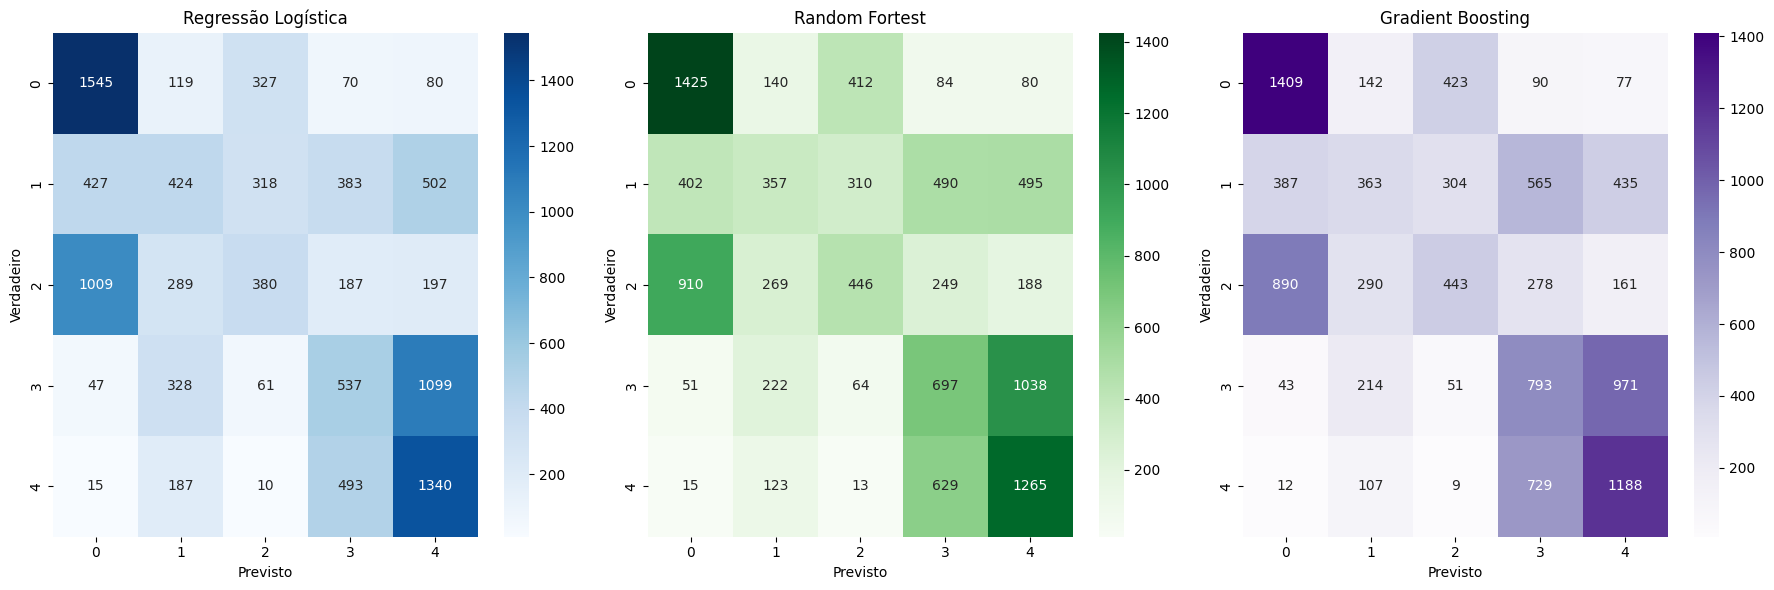

In [70]:
# Confusion Matrix

cm_logreg = confusion_matrix(Y_test, Y_pred_logreg)
cm_rfc = confusion_matrix(Y_test, Y_pred_rfc)
cm_gbc = confusion_matrix(Y_test, Y_pred_gbc)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues")
plt.title("Regressão Logística")
plt.ylabel("Verdadeiro")
plt.xlabel("Previsto")

plt.subplot(1, 3, 2)
sns.heatmap(cm_rfc, annot=True, fmt="d", cmap="Greens")
plt.title("Random Fortest")
plt.ylabel("Verdadeiro")
plt.xlabel("Previsto")

plt.subplot(1, 3, 3)
sns.heatmap(cm_gbc, annot=True, fmt="d", cmap="Purples")
plt.title("Gradient Boosting")
plt.ylabel("Verdadeiro")
plt.xlabel("Previsto")

plt.tight_layout()
plt.show()